# Modeling the Counties in WECC

This notebook shows the data pre-processing to go from the data output by SimplyAnalytics (https://simplyanalytics.com/) to the data inputs useful for the EV charging demand model. 

Developed by Siobhan Powell, 2021.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

## Load Census Data

One download of data includes miles driven; one includes more recent 2020 data on income and housing type: here we combine them.

In [4]:
census_data1 = pd.read_csv('census_us_counties_simplyanalytics_20210621.csv')
census_data2 = pd.read_csv('census_us_counties_simplyanalytics_20210813.csv')
census_data = copy.deepcopy(census_data2)

In [8]:
missing_cols = ['Automotive and Aftermarket: Mileage: Number Of Miles Personally Driven: Mean Value, 2019',
       '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 1 - 999, 2019',
       '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 1,000 -  2,999, 2019',
       '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 10,000 - 14,999, 2019',
       '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 15,000 - 19,999, 2019',
       '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 20,000 - 29,999, 2019',
       '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 3,000 -  4,999, 2019',
       '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 30,000 - 39,999, 2019',
       '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 40,000 - 49,999, 2019',
       '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 5,000 -  7,999, 2019',
       '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 50,000+, 2019',
       '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 8,000 -  9,999, 2019']

In [16]:
for i in census_data.index:
    idx = census_data1[census_data1['FIPS']==census_data.loc[i, 'FIPS']].index
    for col in missing_cols:
        census_data.loc[i, col] = census_data1.loc[idx, col].values[0]

In [22]:
census_data['State'] = census_data['Name'].str.split(',', expand=True)[1].str.replace(' ', '').values

In [24]:
census_data['County Name'] = census_data['Name'].str.split(',', expand=True)[0].values

In [25]:
census_data = census_data.drop(census_data[census_data['State'].isin(['AK', 'PR'])].index).reset_index(drop=True)

In [26]:
mapping = pd.read_csv('county_eiaregion_population_mapping.csv', index_col=0)
mapping.head()

,State_name,Geo_FIPS,County_name,Population,ID,Region_name
0,Alabama,1001,Autauga County,55200,18195,Region_SE
1,Alabama,1003,Baldwin County,208107,18195,Region_SE
2,Alabama,1005,Barbour County,25782,18195,Region_SE
3,Alabama,1007,Bibb County,22527,18195,Region_SE
4,Alabama,1009,Blount County,57645,18195,Region_SE


In [27]:
for i in census_data.index:
    try:
        census_data.loc[i, 'EIA_Region_Name'] = mapping[mapping['Geo_FIPS'] == census_data.loc[i, 'FIPS']]['Region_name'].values[0]
    except:
        print(i)

## Process Data

### Housing Type

In [32]:
hcols = ['% Housing Units in Structure | 1, detached, 2019 [Estimated]',
       '% Housing Units in Structure | 1, attached, 2019 [Estimated]',
       '% Housing Units in Structure | 2, 2019 [Estimated]',
       '% Housing Units in Structure | 3 or 4, 2019 [Estimated]',
       '% Housing Units in Structure | 5 to 9, 2019 [Estimated]',
       '% Housing Units in Structure | 10 to 19, 2019 [Estimated]',
       '% Housing Units in Structure | 20 to 49, 2019 [Estimated]',
       '% Housing Units in Structure | 50 or more, 2019 [Estimated]',
       '% Housing Units in Structure | Mobile home, 2019 [Estimated]',
       '% Housing Units in Structure | Boat, RV, van, etc., 2019 [Estimated]']

In [33]:
census_data[census_data.loc[:, hcols].max(axis=1) == 0]

,Name,FIPS,"# Total Population, 2019 [Estimated]","Median Household Income, 2019 [Estimated]","% Housing Units in Structure | 1, detached, 2019 [Estimated]","% Housing Units in Structure | 1, attached, 2019 [Estimated]","% Housing Units in Structure | 2, 2019 [Estimated]","% Housing Units in Structure | 3 or 4, 2019 [Estimated]","% Housing Units in Structure | 5 to 9, 2019 [Estimated]","% Housing Units in Structure | 10 to 19, 2019 [Estimated]",...,"% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 20,000 - 29,999, 2019","% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 3,000 - 4,999, 2019","% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 30,000 - 39,999, 2019","% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 40,000 - 49,999, 2019","% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 5,000 - 7,999, 2019","% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 50,000+, 2019","% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 8,000 - 9,999, 2019",State,County Name,EIA_Region_Name


In [34]:
census_data.loc[:, hcols].sum(axis=1)

0       99.6380
1       99.7156
2       99.7652
3       99.7673
4       99.4324
         ...   
3108    99.6903
3109    99.5370
3110    99.7041
3111    99.6331
3112    99.5035
Length: 3113, dtype: float64

In [35]:
inds = census_data.loc[(census_data.loc[:, hcols].sum(axis=1) > 0)&(census_data.loc[:, hcols].sum(axis=1) < 100)].index
for i in inds:
    eps = 100 - census_data.loc[i, hcols].sum()
    col = census_data.loc[i, hcols][census_data.loc[i, hcols] == census_data.loc[i, hcols].max()].index.values[0]
    census_data.loc[i, col] += eps
census_data.loc[inds, hcols].sum(axis=1).min()

99.99999999999996

In [38]:
census_data.loc[:, hcols].sum(axis=1).max()

100.00000000000004

In [51]:
census_data['P_House_Detached'] = census_data.loc[:, ['% Housing Units in Structure | 1, detached, 2019 [Estimated]']].sum(axis=1) / 100
census_data['P_House_Attached'] = census_data.loc[:, ['% Housing Units in Structure | 1, attached, 2019 [Estimated]', '% Housing Units in Structure | 2, 2019 [Estimated]']].sum(axis=1) / 100
census_data['P_SmallApt'] = census_data.loc[:, ['% Housing Units in Structure | 3 or 4, 2019 [Estimated]', '% Housing Units in Structure | 5 to 9, 2019 [Estimated]']].sum(axis=1) / 100
census_data['P_LargeApt'] = census_data.loc[:, ['% Housing Units in Structure | 10 to 19, 2019 [Estimated]', '% Housing Units in Structure | 20 to 49, 2019 [Estimated]', '% Housing Units in Structure | 50 or more, 2019 [Estimated]']].sum(axis=1) / 100
census_data['P_Other'] = census_data.loc[:, ['% Housing Units in Structure | Mobile home, 2019 [Estimated]', '% Housing Units in Structure | Boat, RV, van, etc., 2019 [Estimated]']].sum(axis=1) / 100


### Household Income

In [55]:
icols = ['% Household Income | Less than $10,000, 2019 [Estimated]', '% Household Income | $10,000 to $19,999, 2019 [Estimated]', 
        '% Household Income | $20,000 to $29,999, 2019 [Estimated]', '% Household Income | $30,000 to $39,999, 2019 [Estimated]',
         '% Household Income | $40,000 to $49,999, 2019 [Estimated]', '% Household Income | $50,000 to $59,999, 2019 [Estimated]', 
         '% Household Income | $60,000 to $74,999, 2019 [Estimated]', '% Household Income | $75,000 to $99,999, 2019 [Estimated]',
         '% Household Income | $100,000 to $124,999, 2019 [Estimated]', '% Household Income | $125,000 to $149,999, 2019 [Estimated]',
         '% Household Income | $150,000 to $199,999, 2019 [Estimated]', '% Household Income | $200,000 or more, 2019 [Estimated]']

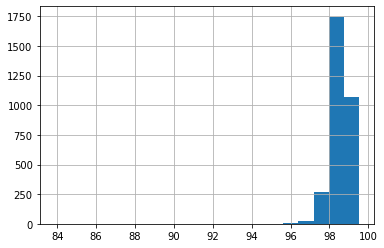

In [60]:
census_data.loc[:, icols].sum(axis=1).hist(bins=20)

In [61]:
inds = census_data.loc[(census_data.loc[:, icols].sum(axis=1) > 0)&(census_data.loc[:, icols].sum(axis=1) < 100)].index
for i in inds:
    eps = 100 - census_data.loc[i, icols].sum()
    col = census_data.loc[i, icols][census_data.loc[i, icols] == census_data.loc[i, icols].max()].index.values[0]
    census_data.loc[i, col] += eps
census_data.loc[:, icols].sum(axis=1).min()

99.99999999999997

In [56]:
icols[6:8]

['% Household Income | $60,000 to $74,999, 2019 [Estimated]',
 '% Household Income | $75,000 to $99,999, 2019 [Estimated]']

In [62]:
census_data['P_LowIncome'] = census_data.loc[:, icols[0:6]].sum(axis=1) / 100
census_data['P_MedIncome'] = census_data.loc[:, icols[6:8]].sum(axis=1) / 100
census_data['P_HighIncome'] = census_data.loc[:, icols[8:]].sum(axis=1) / 100

In [63]:
census_data[census_data['Median Household Income, 2019 [Estimated]'].isna()]

,Name,FIPS,"# Total Population, 2019 [Estimated]","Median Household Income, 2019 [Estimated]","% Housing Units in Structure | 1, detached, 2019 [Estimated]","% Housing Units in Structure | 1, attached, 2019 [Estimated]","% Housing Units in Structure | 2, 2019 [Estimated]","% Housing Units in Structure | 3 or 4, 2019 [Estimated]","% Housing Units in Structure | 5 to 9, 2019 [Estimated]","% Housing Units in Structure | 10 to 19, 2019 [Estimated]",...,County Name,EIA_Region_Name,P_House_Detached,P_House_Attached,P_SmallApt,P_LargeApt,P_Other,P_LowIncome,P_MedIncome,P_HighIncome


### Distance Traveled

In [70]:
subset_cols_d = ['% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 1 - 999, 2019',
                 '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 1,000 -  2,999, 2019',
          '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 3,000 -  4,999, 2019',
          '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 5,000 -  7,999, 2019',
          '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 8,000 -  9,999, 2019',
          '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 10,000 - 14,999, 2019',
          '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 15,000 - 19,999, 2019',
          '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 20,000 - 29,999, 2019',
          '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 30,000 - 39,999, 2019',
          '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 40,000 - 49,999, 2019',
          '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 50,000+, 2019']

In [68]:
census_data[census_data['% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 1 - 999, 2019'].isna()]

,Name,FIPS,"# Total Population, 2019 [Estimated]","Median Household Income, 2019 [Estimated]","% Housing Units in Structure | 1, detached, 2019 [Estimated]","% Housing Units in Structure | 1, attached, 2019 [Estimated]","% Housing Units in Structure | 2, 2019 [Estimated]","% Housing Units in Structure | 3 or 4, 2019 [Estimated]","% Housing Units in Structure | 5 to 9, 2019 [Estimated]","% Housing Units in Structure | 10 to 19, 2019 [Estimated]",...,County Name,EIA_Region_Name,P_House_Detached,P_House_Attached,P_SmallApt,P_LargeApt,P_Other,P_LowIncome,P_MedIncome,P_HighIncome
2095,"Oglala Lakota County, SD",46102,14404,29975.098238,60.469,3.4351,0.7906,2.2356,0.7088,2.699,...,Oglala Lakota County,Region_NW,0.60469,0.042257,0.029444,0.02699,0.296619,0.750979,0.157595,0.091426


In [74]:
res = dict(census_data[census_data['State']=='SD'][subset_cols_d].mean(axis=0))
idx = census_data[census_data['% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 1 - 999, 2019'].isna()].index
for key, val in res.items():
    census_data.loc[idx, key] = val

In [76]:
census_data[census_data['# Aggregate Number Of Vehicles Available By Tenure [B25046] | Aggregate number of vehicles available, 2019 [Estimated]'].isna()]

,Name,FIPS,"# Total Population, 2019 [Estimated]","Median Household Income, 2019 [Estimated]","% Housing Units in Structure | 1, detached, 2019 [Estimated]","% Housing Units in Structure | 1, attached, 2019 [Estimated]","% Housing Units in Structure | 2, 2019 [Estimated]","% Housing Units in Structure | 3 or 4, 2019 [Estimated]","% Housing Units in Structure | 5 to 9, 2019 [Estimated]","% Housing Units in Structure | 10 to 19, 2019 [Estimated]",...,County Name,EIA_Region_Name,P_House_Detached,P_House_Attached,P_SmallApt,P_LargeApt,P_Other,P_LowIncome,P_MedIncome,P_HighIncome
1451,"Kalawao County, HI",15005,84,62375.0,93.75,0.0,0.0,0.0,6.25,0.0,...,Kalawao County,NaN,0.9375,0.0,0.0625,0.0,0.0,0.392158,0.352939,0.254903


In [77]:
census_data = census_data.drop(census_data[census_data['State'].isin(['HI'])].index).reset_index(drop=True) # we don't need to model hawaii

In [78]:
census_data[census_data.isna().sum(axis=1) > 0].isna().sum(axis=0)[census_data[census_data.isna().sum(axis=1) > 0].isna().sum(axis=0) > 0]

Automotive and Aftermarket: Mileage: Number Of Miles Personally Driven: Mean Value, 2019     1
EIA_Region_Name                                                                             54
dtype: int64

In [79]:
for i in census_data.index:
    census_data.loc[i, subset_cols_d] = census_data.loc[i, subset_cols_d] / census_data.loc[i, subset_cols_d].sum()

### Combined into P(D, I, H)

In [85]:
pdih = census_data.loc[:, ['Name', 'FIPS', '# Total Population, 2019 [Estimated]', 'Median Household Income, 2019 [Estimated]', 
                                        'P_House_Detached', 'P_House_Attached', 'P_SmallApt', 'P_LargeApt', 'P_Other', 'P_LowIncome', 
                                        'P_MedIncome', 'P_HighIncome', 'EIA_Region_Name', 'State']]


In [81]:
subset_cols_d

['% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 1 - 999, 2019',
 '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 1,000 -  2,999, 2019',
 '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 3,000 -  4,999, 2019',
 '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 5,000 -  7,999, 2019',
 '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 8,000 -  9,999, 2019',
 '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 10,000 - 14,999, 2019',
 '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 15,000 - 19,999, 2019',
 '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 20,000 - 29,999, 2019',
 '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 30,000 - 39,999, 2019',
 '% Automotive and Aftermarket: Driving: Number Of Miles Personally Driven: 40,000 - 49,999, 2019',
 '% Automoti

In [86]:
for i in pdih.index:
    idx = census_data[census_data['FIPS']==pdih.loc[i, 'FIPS']].index
    dvals = (census_data.loc[idx, subset_cols_d]).values.ravel()
    for j in range(11):
        pdih.loc[i, 'D_'+str(j)] = dvals[j]


In [87]:
pdih.isna().sum(axis=0)

Name                                          0
FIPS                                          0
# Total Population, 2019 [Estimated]          0
Median Household Income, 2019 [Estimated]     0
P_House_Detached                              0
P_House_Attached                              0
P_SmallApt                                    0
P_LargeApt                                    0
P_Other                                       0
P_LowIncome                                   0
P_MedIncome                                   0
P_HighIncome                                  0
EIA_Region_Name                              54
State                                         0
D_0                                           0
D_1                                           0
D_2                                           0
D_3                                           0
D_4                                           0
D_5                                           0
D_6                                     

Fill EIA regions

In [88]:
pdih[pdih['EIA_Region_Name'].isna()]

,Name,FIPS,"# Total Population, 2019 [Estimated]","Median Household Income, 2019 [Estimated]",P_House_Detached,P_House_Attached,P_SmallApt,P_LargeApt,P_Other,P_LowIncome,...,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_10
30,"Alcona County, MI",26001,10272,39739.717782,0.865338,0.007068,0.004295,0.007695,0.115604,0.700522,...,0.128660,0.105489,0.124503,0.112134,0.203485,0.088938,0.054964,0.028226,0.009186,0.019707
36,"Alger County, MI",26003,9107,45393.709024,0.882099,0.024506,0.016138,0.025404,0.051853,0.634448,...,0.127019,0.103389,0.123068,0.111323,0.205357,0.090916,0.056579,0.029693,0.009701,0.021170
38,"Allegan County, MI",26005,115816,60278.104919,0.771081,0.047180,0.040730,0.027010,0.113999,0.479147,...,0.121193,0.098670,0.121138,0.110456,0.213132,0.096081,0.060417,0.032234,0.010497,0.022622
50,"Alpena County, MI",26007,28437,42031.636412,0.817270,0.038066,0.048969,0.036882,0.058813,0.658859,...,0.126985,0.102980,0.122572,0.110722,0.205657,0.091201,0.056752,0.030158,0.009887,0.021758
74,"Aransas County, TX",48007,25187,45490.816106,0.636331,0.045937,0.050684,0.068257,0.198791,0.609169,...,0.126145,0.102992,0.122861,0.111261,0.206788,0.091501,0.056993,0.029828,0.009581,0.020780
88,"Ashland County, WI",55003,15621,43364.077730,0.753808,0.059269,0.044658,0.051083,0.091182,0.639553,...,0.127394,0.102320,0.121801,0.110170,0.205431,0.091462,0.056821,0.030783,0.010145,0.022643
131,"Barnstable County, MA",25001,213299,70732.473070,0.813530,0.075284,0.064690,0.041779,0.004717,0.415021,...,0.123092,0.100281,0.121836,0.111217,0.211469,0.094728,0.059000,0.030821,0.009734,0.020570
148,"Bay County, MI",26017,104226,47368.220723,0.774086,0.057726,0.060376,0.058451,0.049361,0.615016,...,0.124506,0.100842,0.121516,0.110328,0.209199,0.093665,0.058313,0.031362,0.010199,0.022322
186,"Benzie County, MI",26019,17541,55951.131303,0.882845,0.034580,0.018128,0.013896,0.050551,0.496510,...,0.124315,0.101741,0.122624,0.111288,0.209251,0.093124,0.057940,0.030428,0.009927,0.021263
194,"Berrien County, MI",26021,154393,48791.340838,0.757551,0.062143,0.063563,0.066146,0.050597,0.592737,...,0.124643,0.100891,0.121473,0.110366,0.208654,0.093458,0.058329,0.031355,0.010158,0.022370


In [89]:
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='CA')].index, 'EIA_Region_Name'] = 'Region_CAL'

In [90]:
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='TX')].index, 'EIA_Region_Name'] = 'Region_TEX'

In [91]:
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='NY')].index, 'EIA_Region_Name'] = 'Region_NY'
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='FL')].index, 'EIA_Region_Name'] = 'Region_FLA'

In [92]:
pdih[pdih['EIA_Region_Name'].isna()].shape

(45, 25)

In [93]:
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='MI')].index, 'EIA_Region_Name'] = 'Region_MIDW'

In [94]:
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='WI')].index, 'EIA_Region_Name'] = 'Region_MIDW'

In [95]:
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='WA')].index, 'EIA_Region_Name'] = 'Region_NW'
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='MA')].index, 'EIA_Region_Name'] = 'Region_NE'

In [96]:
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='VA')].index, 'EIA_Region_Name'] = 'Region_MIDA'
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='IL')].index, 'EIA_Region_Name'] = 'Region_MIDW'
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='OH')].index, 'EIA_Region_Name'] = 'Region_MIDA'
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='NC')].index, 'EIA_Region_Name'] = 'Region_CAR'
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='ME')].index, 'EIA_Region_Name'] = 'Region_NE'
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='MN')].index, 'EIA_Region_Name'] = 'Region_MIDW'
pdih.loc[pdih.loc[(pdih['EIA_Region_Name'].isna())&(pdih['State']=='LA')].index, 'EIA_Region_Name'] = 'Region_MIDW'

In [97]:
pdih.shape

(3108, 25)

In [98]:
pdih['EIA_Region_Name'].unique()

array(['Region_CAR', 'Region_MIDW', 'Region_MIDA', 'Region_NW',
       'Region_CENT', 'Region_NE', 'Region_FLA', 'Region_CAL',
       'Region_NY', 'Region_TEN', 'Region_TEX', 'Region_SE', 'Region_SW'],
      dtype=object)

Check

In [99]:
pdih[pdih['EIA_Region_Name'].isna()]

,Name,FIPS,"# Total Population, 2019 [Estimated]","Median Household Income, 2019 [Estimated]",P_House_Detached,P_House_Attached,P_SmallApt,P_LargeApt,P_Other,P_LowIncome,...,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_10


In [101]:
pdih.loc[:, ['D_'+str(i) for i in range(11)]].sum(axis=1).min()

0.9999999999999996

In [102]:
pdih['State'] = pdih['Name'].str.split(',', expand=True)[1].str.replace(' ', '').values

In [104]:
pdih.isna().sum(axis=0)

Name                                         0
FIPS                                         0
# Total Population, 2019 [Estimated]         0
Median Household Income, 2019 [Estimated]    0
P_House_Detached                             0
P_House_Attached                             0
P_SmallApt                                   0
P_LargeApt                                   0
P_Other                                      0
P_LowIncome                                  0
P_MedIncome                                  0
P_HighIncome                                 0
EIA_Region_Name                              0
State                                        0
D_0                                          0
D_1                                          0
D_2                                          0
D_3                                          0
D_4                                          0
D_5                                          0
D_6                                          0
D_7          

In [105]:
pdih.to_csv('../Data/CP136/pdih_us_counties.csv')

## Extract Vehicle Count Data

In [123]:
county_adoption_baseline = None
states_included = pdih['State'].unique()
for state in states_included:
    inds = pdih[pdih['State']==state].index
    county_adoption_here = pdih.loc[inds, ['State', 'Name', 'FIPS', 'Num Vehicles', '# Total Population, 2019 [Estimated]', 'Median Household Income, 2019 [Estimated]']].copy(deep=True).reset_index(drop=True)
    county_adoption_here = county_adoption_here.rename(columns={'Name':'County', 'FIPS':'County FIPS', 'Num Vehicles':'Current Vehicles', '# Total Population, 2019 [Estimated]':'Population', 'Median Household Income, 2019 [Estimated]':'Income'})
    county_adoption_here['Goal Fraction'] = county_adoption_here['Current Vehicles'].values / county_adoption_here['Current Vehicles'].sum()
    if county_adoption_baseline is None:
        county_adoption_baseline = copy.deepcopy(county_adoption_here)
    else:
        county_adoption_baseline = pd.concat((county_adoption_baseline, county_adoption_here), axis=0)
    

In [126]:
county_adoption_baseline.to_csv('../Data/CP136/adoption_df_us_counties.csv', index=None)